# Main Climatologic Classes

## ClimatAverage

Init: give year, month and measure wanted
Load the "averages" files
Allows to display them as images


## ClimaticDataWraper

Init: give the [years] wanted

Methods: get measures averages according to coordinates for the 12 months in the specified years

Example: 

```
    wrapper = ClimaticDataWraper(["2016"])
    pereiraCoord = [-75.690601,4.8087174]
    print wrapper.getTminAverages(pereiraCoord)
```
It will give you: 

```
['18.556840133667' '18.5997200775146' '18.6267597961426' '19.1054000854492'
 '19.076600112915' '18.5496399688721' '18.4978398895264' '17.971960067749'
 '18.0743200683594' '17.9921199798584' '18.6911999511719'
 '18.0828800964355']
```


720
720
3.500417
-77.50042
0.00416666700000001
[-77.50042    -77.49625333 -77.49208667 -77.48792    -77.48375333
 -77.47958666 -77.47542    -77.47125333 -77.46708666 -77.46292    -77.45875333
 -77.45458666 -77.45042    -77.44625333 -77.44208666 -77.43791999
 -77.43375333 -77.42958666 -77.42541999 -77.42125333 -77.41708666
 -77.41291999 -77.40875333 -77.40458666 -77.40041999 -77.39625332
 -77.39208666 -77.38791999 -77.38375332 -77.37958666 -77.37541999
 -77.37125332 -77.36708666 -77.36291999 -77.35875332 -77.35458665
 -77.35041999 -77.34625332 -77.34208665 -77.33791999 -77.33375332
 -77.32958665 -77.32541999 -77.32125332 -77.31708665 -77.31291998
 -77.30875332 -77.30458665 -77.30041998 -77.29625332 -77.29208665
 -77.28791998 -77.28375332 -77.27958665 -77.27541998 -77.27125331
 -77.26708665 -77.26291998 -77.25875331 -77.25458665 -77.25041998
 -77.24625331 -77.24208665 -77.23791998 -77.23375331 -77.22958664
 -77.22541998 -77.22125331 -77.21708664 -77.21291998 -77.20875331
 -77.20458664 -7

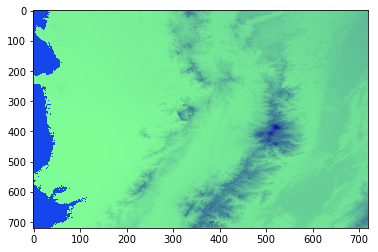

In [3]:
import numpy as np
import math
from PIL import Image
from scipy.misc import toimage
from matplotlib.pyplot import imshow

%matplotlib inline


class ClimatAverages:
    
    def __init__(self, year="2011", month="1", measure="tmin"
                 ,path = "/mnt/hgfs/sharedKali/TB_Data_Meteo/outputs_yearly_v2_2011_2016/average/",):
        
        self.path = str(path)
        self.measure = str(measure)
        self.year = str(year)
        self.month = str(month)
        
        
        records_matrix = open(self.path  + measure + '_' + year + '_' + month + '.asc')
        # Reading the data 
        tmpMatriceData =  [l.strip().split(' ') for l in records_matrix.readlines()[6::]]
        records_matrix.seek(0)
        tmpMatriceInfo =  [l.strip().split(' ') for l in records_matrix.readlines()[:5]]
        self.matriceData = np.array(tmpMatriceData)
        self.matriceInfo = np.array(tmpMatriceInfo)
        records_matrix.close()
        
        self.NCOLS = self.matriceInfo[0,1]
        self.NROW = self.matriceInfo[1,1]
        self.XLLCORNER = self.matriceInfo[2,1]
        self.YLLCORNER = self.matriceInfo[3,1]
        self.CELLSIZE = self.matriceInfo[4,1]
        
        
        self.lons = []
        self.lats = []
        
        basex = float(self.XLLCORNER)
        basey = float(self.YLLCORNER)
        
        # Coordonnées sur x et y (décimal)
        for i in range(0, 720):
            self.lons.append(basex)
            self.lats.append(basey)
            basex += float(self.CELLSIZE)
            basey += float(self.CELLSIZE)
        
        
        self.lons = np.array(self.lons)
        
        self.lats = np.array(self.lats)
        
        # Minimums and maximums
        self.minLon = self.lons[0]
        self.maxLon = self.lons[-1]
        self.minLat = self.lats[0]
        self.maxLat = self.lats[-1]
        
    # The table is a 720 x 720 table
    # TODO: check the coordinate are in the range (in risaralda) and then convert it (lon and lat) in the range 0-720
    
    
    
    def isOnMap(self, lon, lat):
        if(lon < self.minLon or lon > self.maxLon):
            return False
        elif(lat < self.minLat or lat > self.maxLat):
            return False
        else:
            return True
    
    
    # Points: idx of the table you want to be red
    def displayMap(self, points = [None]):
        
        
        NewMax = 255
        NewMin = 0
        
        array2 = np.array(self.matriceData) 
        array2range = []
        
        OldMax = float(-8000)
        OldMin = float(8000)
        
        for row in self.matriceData:
            for val in row:
                if (float(val) != -9999) and (float(val) < OldMin):
                    OldMin = float(val)
                if (float(val) != -9999) and (float(val) > OldMax):
                    OldMax = float(val)
        #print("Old max : {} and min : {}".format(OldMax, OldMin))
        
        NewRange = float(NewMax - NewMin)
        NewRange = float(NewRange)
        
        NewMax = float(NewMax)
        NewMin = float(NewMin)
        
        OldRange = float(OldMax) - float(OldMin)
        OldRange = float(OldRange)
        
        # Convert values range (temperature, rain, etc in 0-255 range)
        for row in array2:
            tempLine = []
            for OldValue in row:
                NewValue = 0
                if(float(OldValue) == -9999):
                    color = [20,70,235]
                else:
                    NewValue = float(((float(OldValue) - OldMin) * NewRange) / OldRange) + NewMin
                    color = [int(NewValue)/2, int(NewValue), 150]
                
                tempLine.append(color)
            #print tempLine
            array2range.append(tempLine)
        
        array2range = np.array(array2range)
        
        data = array2range
        
        data[0,0] = [0,0,0]
        data[-1,-1] = [255,255,255]
        
        
        if(len(points) > 0):
            for point in points:
                data[point[0],point[1]] = [255, 0, 0]
                if(point[0] < 719 and point[0] > 0 and point[1] > 0 and point[1] < 719):
                    data[point[0],point[1]+1] = data[point[0],point[1]-1] = data[point[0]-1,point[1]] = data[point[0]+1,point[1]] = [255, 0, 0]
                    
                
        
        img = toimage(data)
        img.show()
        imshow(img, interpolation='nearest', aspect='auto')
    
    
    def getNearestCoordIdx(self, coord):
        
        lon = coord[0]
        lat = coord[1]
        idxLon = (np.abs(self.lons-lon)).argmin()
        idxLat = (np.abs(self.lats-lat)).argmin()
        idxLat = np.abs(idxLat - 719)
        print("coords: {}  idx lon and lat nearest cord = {} ".format(coord,[idxLon, idxLat]))
        
        return [idxLat, idxLon]
    
    
    # Allows to get the nearest value, according to the given coordinates
    #
    # Params: 
    #         - Coordinates [Longitude, Latitude]
    #
    # 
    def getNearestCoordValue(self, coord):
        indices = self.getNearestCoordIdx(coord)
        return self.matriceData[indices[0], indices[1]]
        
        
    
test = ClimatAverages(year="2011", month="1", measure="tmean")

#print test.matriceInfo
print test.NCOLS
print test.NROW
print test.YLLCORNER
print test.XLLCORNER
print test.CELLSIZE
print test.lons
print test.lats


# coord pereira: [-75.690601,4.8087174]
# coord nevado del ruiz [-75.3188351,4.8919993]
# coord laguna chinganza [-73.75017,4.52529]
# coord neige etc au nord [-72.2975, 6.4941666] #nooooo

# coord neige sous nevado [-75.32954409252852,4.663619324550555]

#print test.isOnMap(-75.3188351,4.8919993)
#print test.isOnMap(-75.690601,4.8087174)
#print test.isOnMap(-75.690601,4.8087174)
#print test.isOnMap(-72.2975, 6.4941666) # false, not on the map
coordlaguna = [-73.75017,4.52529]
coordnevado = [-75.3188351,4.8919993]
coordpereira = [-75.690601,4.8087174]
coordnevadosud = [-75.32954409252852,4.663619324550555]

coordTest = [-75.3188351,4.8919993]
print("Coord value near nevado del ruiz (snow): {}".format(test.getNearestCoordValue(coordTest)))


print("Coord value near pereira: {}".format(test.getNearestCoordValue(coordpereira)))


print("Coord value near nevado sud: {}".format(test.getNearestCoordValue(coordnevadosud)))


print("Idx on map table for coordnevado {} are {}".format(coordnevado, test.getNearestCoordIdx(coordnevado)))

#test.displayMap([test.getNearestCoordIdx(coordTest)])

%matplotlib inline
test.displayMap([test.getNearestCoordIdx(coordnevadosud),test.getNearestCoordIdx(coordnevado), test.getNearestCoordIdx(coordpereira)])


test.displayMap([test.getNearestCoordIdx(coordnevadosud),test.getNearestCoordIdx(coordnevado), test.getNearestCoordIdx(coordpereira)])

In [2]:
#years = ["2011", "2012", "2013", "2014", "2015", "2016"]
years = ["2016"]
months = ["1","2","3","4","5","6","7","8","9","10","11","12"]

tmaxAverages = []
tminAverages = []
tmeanAverages = []
dtrAverages = []

for year in years: 
    for month in months:
        #print("loading tmax for {}.{}".format(month,year))
        tmaxAverages.append(ClimatAverages(year, month, measure="tmax"))
        tminAverages.append(ClimatAverages(year, month, measure="tmin"))
        tmeanAverages.append(ClimatAverages(year, month, measure="tmean"))
        dtrAverages.append(ClimatAverages(year, month, measure="dtr"))



for tmax in tmaxAverages:
    print("tmax in pereira: {}".format(tmax.getNearestCoordValue([-75.690601,4.8087174])))

for tmin in tminAverages:
    print("tmin in pereira: {}".format(tmin.getNearestCoordValue([-75.690601,4.8087174])))
    
for tmean in tmeanAverages:
    print("tmean in pereira: {}".format(tmean.getNearestCoordValue([-75.690601,4.8087174])))
    
for dtr in dtrAverages:
    print("dtr in pereira: {}".format(dtr.getNearestCoordValue([-75.690601,4.8087174])))

tmax in pereira: 29.1390000152588
tmax in pereira: 28.7355601501465
tmax in pereira: 29.3629201507568
tmax in pereira: 29.26
tmax in pereira: 28.293759765625
tmax in pereira: 28.1901201629639
tmax in pereira: 28.9187601470947
tmax in pereira: 29.0170001983643
tmax in pereira: 29.1284000396729
tmax in pereira: 28.0206001281738
tmax in pereira: 27.5792000579834
tmax in pereira: 28.0537200164795
tmin in pereira: 18.556840133667
tmin in pereira: 18.5997200775146
tmin in pereira: 18.6267597961426
tmin in pereira: 19.1054000854492
tmin in pereira: 19.076600112915
tmin in pereira: 18.5496399688721
tmin in pereira: 18.4978398895264
tmin in pereira: 17.971960067749
tmin in pereira: 18.0743200683594
tmin in pereira: 17.9921199798584
tmin in pereira: 18.6911999511719
tmin in pereira: 18.0828800964355
tmean in pereira: 23.8479204177856
tmean in pereira: 23.6676397323608
tmean in pereira: 23.9948406219482
tmean in pereira: 24.1827001571655
tmean in pereira: 23.6851806640625
tmean in pereira: 23.369

In [11]:
#years = ["2011", "2012", "2013", "2014", "2015", "2016"]



class ClimaticDataWraper:
    
    def __init__(self, years):
        
        months = ["1","2","3","4","5","6","7","8","9","10","11","12"]
        
        # All datas
        self.globalTmaxAverages = []
        self.globalTminAverages = []
        self.globalTmeanAverages = []
        self.globalDtrAverages = []


        for year in years: 
            print "year"
            print year
            for month in months:
                print("loading tmax for {}.{}".format(month,year))
                self.globalTmaxAverages.append(ClimatAverages(year, month, measure="tmax"))
                self.globalTminAverages.append(ClimatAverages(year, month, measure="tmin"))
                self.globalTmeanAverages.append(ClimatAverages(year, month, measure="tmean"))
                self.globalDtrAverages.append(ClimatAverages(year, month, measure="dtr"))
    
    # Coord = [lon, lat]
    def getTminAverages(self, coord):
        dataVector = []
        for tmin in self.globalTminAverages:
            dataVector.append(tmin.getNearestCoordValue([coord[0], coord[1]]))
        return np.array(dataVector)
    
    # Coord = [lon, lat]
    def getTmaxAverages(self, coord):
        dataVector = []
        for tmax in self.globalTmaxAverages:
            dataVector.append(tmax.getNearestCoordValue([coord[0], coord[1]]))
        return np.array(dataVector)
    
    # Coord = [lon, lat]
    def getTmeanAverages(self, coord):
        dataVector = []
        for tmean in self.globalTmeanAverages:
            dataVector.append(tmean.getNearestCoordValue([coord[0], coord[1]]))
        return np.array(dataVector)
    
    # Coord = [lon, lat]
    def getDtrAverages(self, coord):
        dataVector = []
        for dtr in self.globalDtrAverages:
            dataVector.append(dtr.getNearestCoordValue([coord[0], coord[1]]))
        return np.array(dataVector)
    
    

In [12]:
wrapper = ClimaticDataWraper(["2016"])
pereiraCoord = [-75.690601,4.8087174]

print wrapper.getTminAverages(pereiraCoord)

year
2016
loading tmax for 1.2016
loading tmax for 2.2016
loading tmax for 3.2016
loading tmax for 4.2016
loading tmax for 5.2016
loading tmax for 6.2016
loading tmax for 7.2016
loading tmax for 8.2016
loading tmax for 9.2016
loading tmax for 10.2016
loading tmax for 11.2016
loading tmax for 12.2016
['18.556840133667' '18.5997200775146' '18.6267597961426' '19.1054000854492'
 '19.076600112915' '18.5496399688721' '18.4978398895264' '17.971960067749'
 '18.0743200683594' '17.9921199798584' '18.6911999511719'
 '18.0828800964355']
